Preprocess data
1. Load dataset, examine structure and stats
2. Check for missing values, outliers, other data quality issues
3. Handle missing values by imputing them using techniques like mean, median, or regressio-based imputation.
4. Perform feautre scaling to ensure that all input features are on a similar scale

In [1]:
# Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [16]:
from sklearn.metrics import accuracy_score


In [2]:
data=pd.read_csv('Breast_cancer_data.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
#check for nan values
data.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

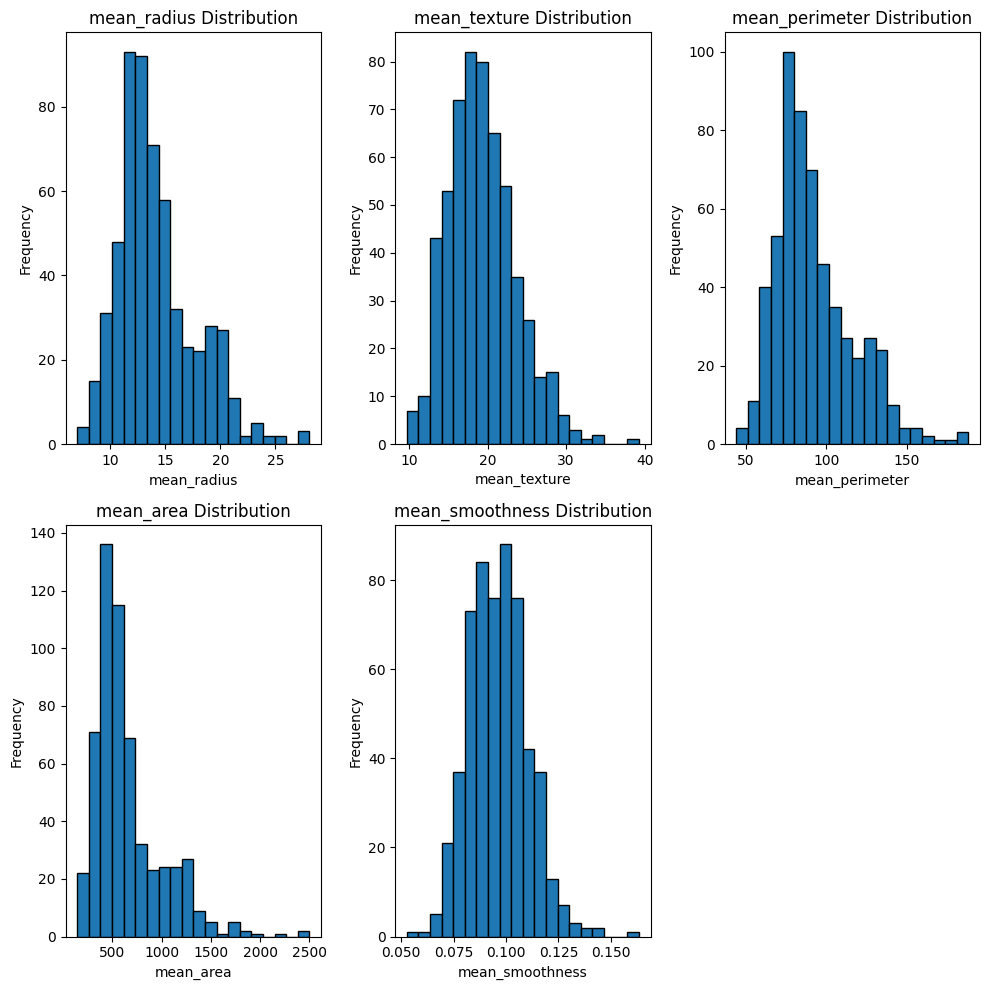

In [4]:
#histogram for each feature
column_names = ["mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness"]

plt.figure(figsize=(10,10))

for i, column in enumerate(column_names):
    plt.subplot(2,3, i+1) #2 rows, 3 columns, i+1 plots
    plt.hist(data[column], bins=20, edgecolor="black")
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
plt.tight_layout()
plt.show()

In [5]:
#mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness are not 0
column_names={"mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness"}
zero_counts = {}

for column in column_names:
    zero_counts[column] = (data[column] == 0).sum()
print(zero_counts)

{'mean_texture': 0, 'mean_radius': 0, 'mean_smoothness': 0, 'mean_area': 0, 'mean_perimeter': 0}


<function matplotlib.pyplot.show(close=None, block=None)>

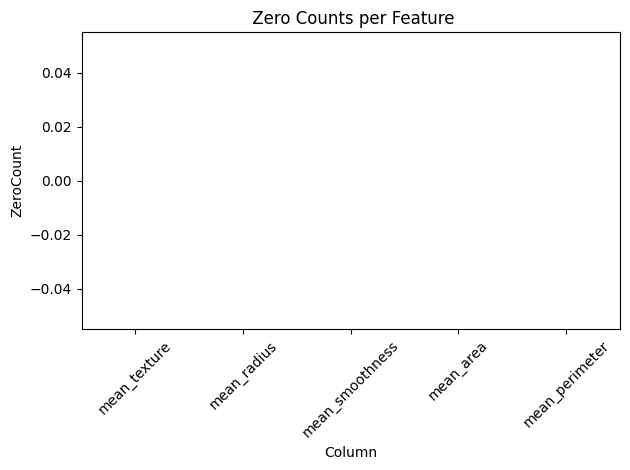

In [6]:
zero_df = pd.DataFrame(list(zero_counts.items()), columns=["Column", "ZeroCount"])

sns.barplot(data=zero_df, x="Column", y="ZeroCount")
plt.title(" Zero Counts per Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

Glucose, Blood Pressure, SkinThickness, Insulin, and BMI 
have some 0's so change to the mean values for each.

In [48]:
#get rid of 0's for those columns and replace with mean
for column in column_names:
    data[column].replace(to_replace = 0, value = data[column].mean(), inplace=True)

zero_counts = {}
for column in column_names:
    zero_counts[column] = (data[column] == 0).sum()

print(zero_counts)

{'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0}


C:\Users\sebas\AppData\Local\Temp\ipykernel_6152\906969221.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].replace(to_replace = 0, value = data[column].mean(), inplace=True)


In [8]:
#data split
X = data.drop("diagnosis", axis=1).values
y = data["diagnosis"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [19]:
#make model
model = Sequential()
model.add(Dense(32, activation="relu", input_shape=(5,)))
model.add(Dense(1, activation="sigmoid"))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

#evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Model - Accuracy: ", accuracy)

Epoch 1/15


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5282 - loss: 0.6928
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6399 - loss: 0.6911 
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6638 - loss: 0.6888 
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6380 - loss: 0.6878 
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6182 - loss: 0.6874 
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6372 - loss: 0.6851 
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6355 - loss: 0.6837 
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6573 - loss: 0.6806 
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6076 - loss: 0.6839 
Epoch 10/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6445 - loss: 0.6793 
Epoch 11/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5885 - loss: 0.6845 
Epoch 12/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6245 - los

Epoch 1/40


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5962 - loss: 0.7369
Epoch 2/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7205 - loss: 0.5306
Epoch 3/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7575 - loss: 0.5266
Epoch 4/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8574 - loss: 0.3942 
Epoch 5/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8635 - loss: 0.3762 
Epoch 6/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8804 - loss: 0.3421
Epoch 7/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8504 - loss: 0.3308
Epoch 8/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8786 - loss: 0.3288 
Epoch 9/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8784 - loss: 0.3121
Epoch 10/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8931 - loss: 0.2898 
Epoch 11/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8607 - loss: 0.3482
Epoch 12/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8922 - loss: 0.2

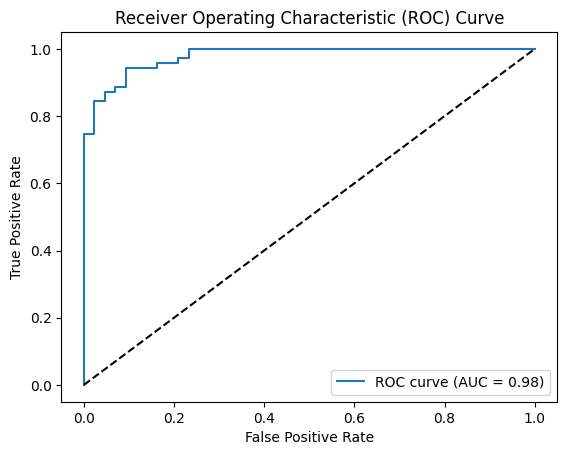

In [ ]:
#Variation 1, more hidden layers
from tensorflow.keras.layers import Dropout, BatchNormalization

n_features = 5

model_variation1 = Sequential([
  Dense(32, activation="relu", input_shape=(n_features,)),
  BatchNormalization(),       # stabilize activations. Normalizes a layer’s inputs to zero mean and unit variance (with learnable scale and shift) each batch, which stabilizes and accelerates training.
  Dropout(0.3),               # randomly zero 30% of units. Randomly “drops” a proportion of neurons’ outputs during training to prevent co-adaptation and reduce over-fitting.
  Dense(24, activation="relu"),
  BatchNormalization(),
  Dropout(0.3),
  Dense(16, activation="relu"),
  Dense(1, activation="sigmoid")
])

model_variation1.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])
model_variation1.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)

#evaluate
loss, accuracy = model_variation1.evaluate(X_test, y_test, verbose=0)
print("Model Variation 1 - accuracy: ", accuracy)

y_pred = model_variation1.predict(X_test)
y_pred_prob = np.squeeze(y_pred) #remove dimensions of size 1

#generate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)

#plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1], 'k--') #Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [33]:
# Youden’s J statistic (Youden's Index)
#Finds optimal classification threshold on ROC curve
# J = TPR - FPR
#This is for when the positives and negatives are not equal in the data (ie 80% positives and 20% negatives)
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_thresh = thresholds[best_idx]
print("Optimal threshold:", best_thresh)

y_best = (y_pred_prob >= best_thresh).astype(int)
acc_best = accuracy_score(y_test, y_best)
print("Accuracy at optimal threshold:", acc_best)

#Results
#Optimal threshold: 0.73719996
#Accuracy at optimal threshold: 0.9298245614035088
#Optimal threshold means: If prediction is >= .73, then positive, else negative


Optimal threshold: 0.67229676
Accuracy at optimal threshold: 0.9298245614035088


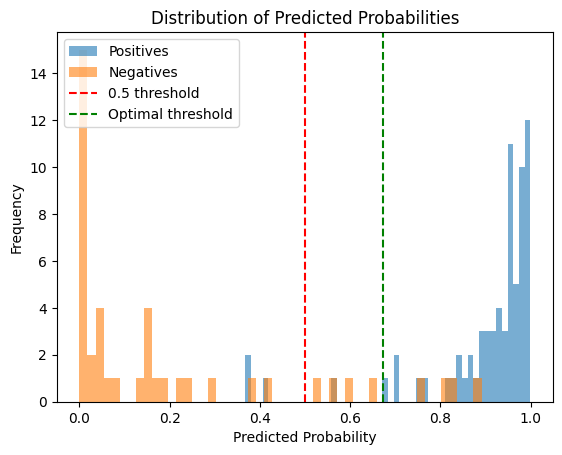

In [34]:
#histogram of predicted probabilites
plt.hist(y_pred_prob[y_test == 1], bins=50, alpha=0.6, label="Positives")
plt.hist(y_pred_prob[y_test == 0], bins=50, alpha=0.6, label="Negatives")
plt.axvline(0.5, color='red', linestyle='--', label='0.5 threshold')
plt.axvline(best_thresh, color='green', linestyle='--', label='Optimal threshold')
plt.legend()
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.show()


Accuracy = (TP + TN) / (TP + FP + TN + FN)
How many total predictions I got right. 
Misleading when classes are imbalanced.
ie. (if 90% of cases are benign, predicting “benign” always gives you 90% accuracy, even if you miss all cancers.)

Precision = TP / (TP + FP)
Positive predicted value
High precision = few FP
Important when false positives have consequences (stressing the patient out)
ie. (When I predict cancer, how often am I right)

Recall/Sensitivity/True Positive Rate(TPR) = TP / (TP + FN)
High recall = few missed cancers
Important if you don't want to miss true positives
ie.(Of all actual cancer cases, how many did I catch)

Specificity/True Negative Rate(TNR) = TN / (TN + FP)
High specificity = few false alarms
Important to avoid false alarms.
ie. (Of all healthy people, how many did I correctly predict are healthy)

False Positive Rate(FPR) = 1 - specificity = FP / (FP + TN)
ie. (How often do I incorrectly say someone has cancer when they don't)

False Negative Rate(FNR) = 1 - recall = FN / (FN + TP)
ie. (How often do i miss cancer when it's really there)

F1 score = 2 * ( (Precision * Recall) / (Precision + Recall) )
Balance between false alarms and missed cases
Useful for imbalanced data. 

AUC-ROC (Area Under ROC Curve) 
Measures ability to rank positives above negatives regardless of threshold
.5 = random to 1 = perfect
Useful for comparing classifiers before picking decision threshold

AUC-PR (Precision-Recall Curve)
Better than ROC when positives are rare (ie. only 10% positives)
Focuses on how well model performs on positive class

Confusion Matrix
0 TN 	FP 
1 FN 	TP 

Best for cancer prediction
1. Recall/sensitivity - Catch as many positives as possible. High = good
2. Precision/specificity - Minimize false alarms. High = good
